# CAPSTONE PROJECT

# **Title : Predictive Modeling for Loan Approval** 

# Importing Libraries

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
# importing the dataset
df = pd.read_csv('Bank_Loan_Modelling.csv')
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Understanding the Dataset

In [4]:
# checking number of rows and columns in dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 5000
Number of columns: 14


In [5]:
# Describe dataset's statistical details
df.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [6]:
# Checking Number of Unique values in dataset
unique_values = df.nunique()
unique_values

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
# Checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Checking duplicate values in dataset
df.duplicated().sum()

0

# Cleaning the Dataset

In [9]:
#Finding the null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values present in the data

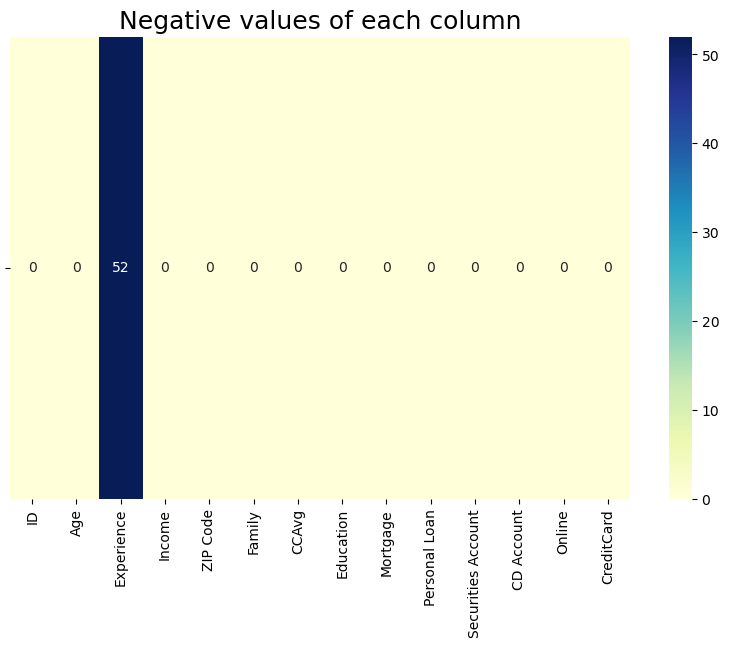

In [10]:
# Check the number of negative values for each feature using heatmap
negative_counts = (df < 0).sum()
plt.figure(figsize=(10, 6))
sns.heatmap((df.lt(0).sum()).to_frame(name='').T, cmap='YlGnBu', 
            annot=True, fmt='d').set_title('Negative values of each column', fontsize=18)
plt.show()

In [11]:
# 52 negative values are in the Experience column and do not make sense. So, we decide to convert them into positive values.
df['Experience']= abs(df['Experience'])
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [12]:
# CCAvg is based on month, while Income is based on year which has to be converted into monthly bases
df['Income'] = round(df['Income']/12, 2)
df.head(10).style.set_properties(subset=['Income'])  

In [13]:
# ID and ZIP Code are the redundant columns which does not hold predictive power so it can be dropped.
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df.shape

(5000, 12)

# Outliers

In [14]:
# seperate numerical columns 
num_cols = pd.DataFrame (df, columns= ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cat_cols = pd.DataFrame (df, columns= ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']) 

In [15]:
# Separate numerical and categorical columns into different lists first
numerical_columns = list(df.loc[:,['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])
categorical_columns = list(df.loc[:,['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']])

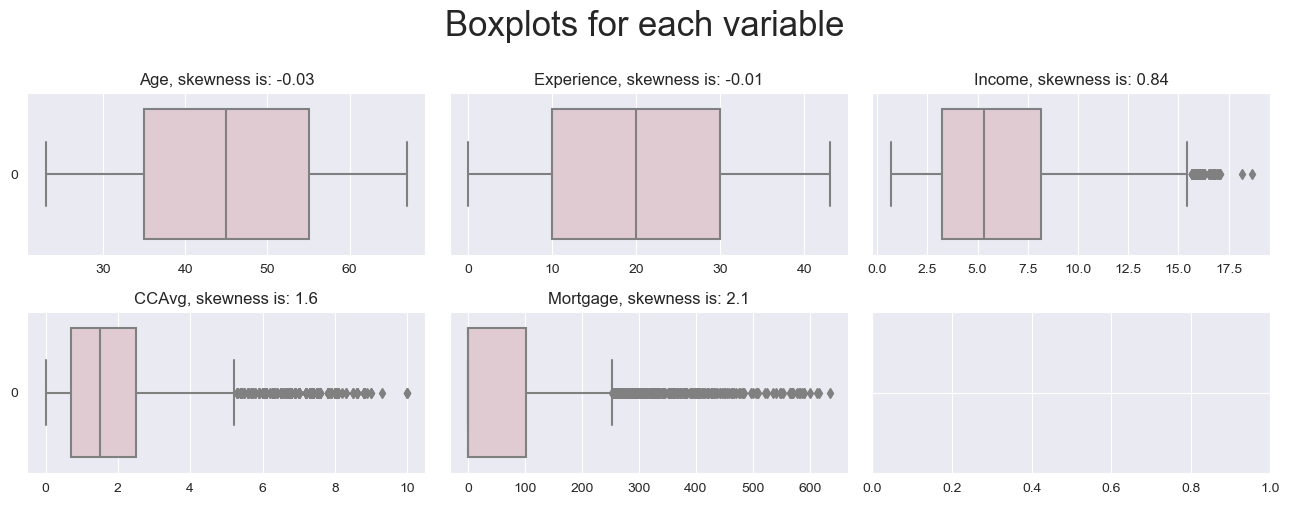

In [16]:
# Visualizing the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#e3c8d2', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

Detecting Outliers using IQR(Inter Outliers Range)

In [17]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

Age  Experience  Income  CCAvg  Mortgage
0    0           0      96    324       291

In [18]:
# final dataset after cleaning 
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

# EDA (Exploratory Data Analysis)

**Data Distribution in Continuos and Categorical Features** 

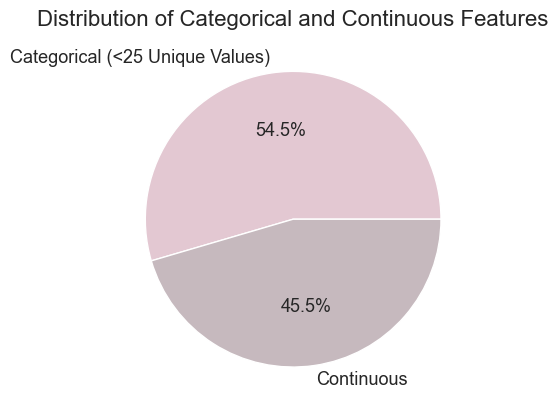

In [19]:
TARGET = 'Personal Loan'
FEATURES = [col for col in df.columns if col not in ['df', TARGET]]

cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

#define labels and colours of the piechart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#e3c8d2', '#c6b9be']
plt.pie([num_cat_features, num_cont_features], labels=labels, colors=colors, textprops={'fontsize': 13}, autopct='%1.1f%%')

# Add title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

#show the plot
plt.show()

**Data Imbalance**

In [20]:
y = df['Personal Loan']
value_counts = y.value_counts()

print(f"Percentage of Borrowed loan: {round(value_counts[1] / len(y) * 100, 2)}%  --> ({value_counts[1]} Customer)")
print(f"Percentage of Unborrowed loan: {round(value_counts[0] / len(y) * 100, 2)}%  --> ({value_counts[0]} Customer)")

Percentage of Borrowed loan: 9.6%  --> (480 Customer)
Percentage of Unborrowed loan: 90.4%  --> (4520 Customer)


In [21]:
# Visualizing imbalance in data using piechart
labels=["Don't Accept Loan", "Accept Loan"]

Accept_or_Dont_Accept = df['Personal Loan'].value_counts().tolist()
values = [Accept_or_Dont_Accept[0], Accept_or_Dont_Accept[1]]

fig = px.pie(values=df['Personal Loan'].value_counts(), names=labels, width=700, height=400, color_discrete_sequence=['#d3979e', '#cccccc']
             ,title="Accept Loan vs. Don't Accept Loan")    
fig.show()

**Univariate Analysis**

Exploring Categorical Features

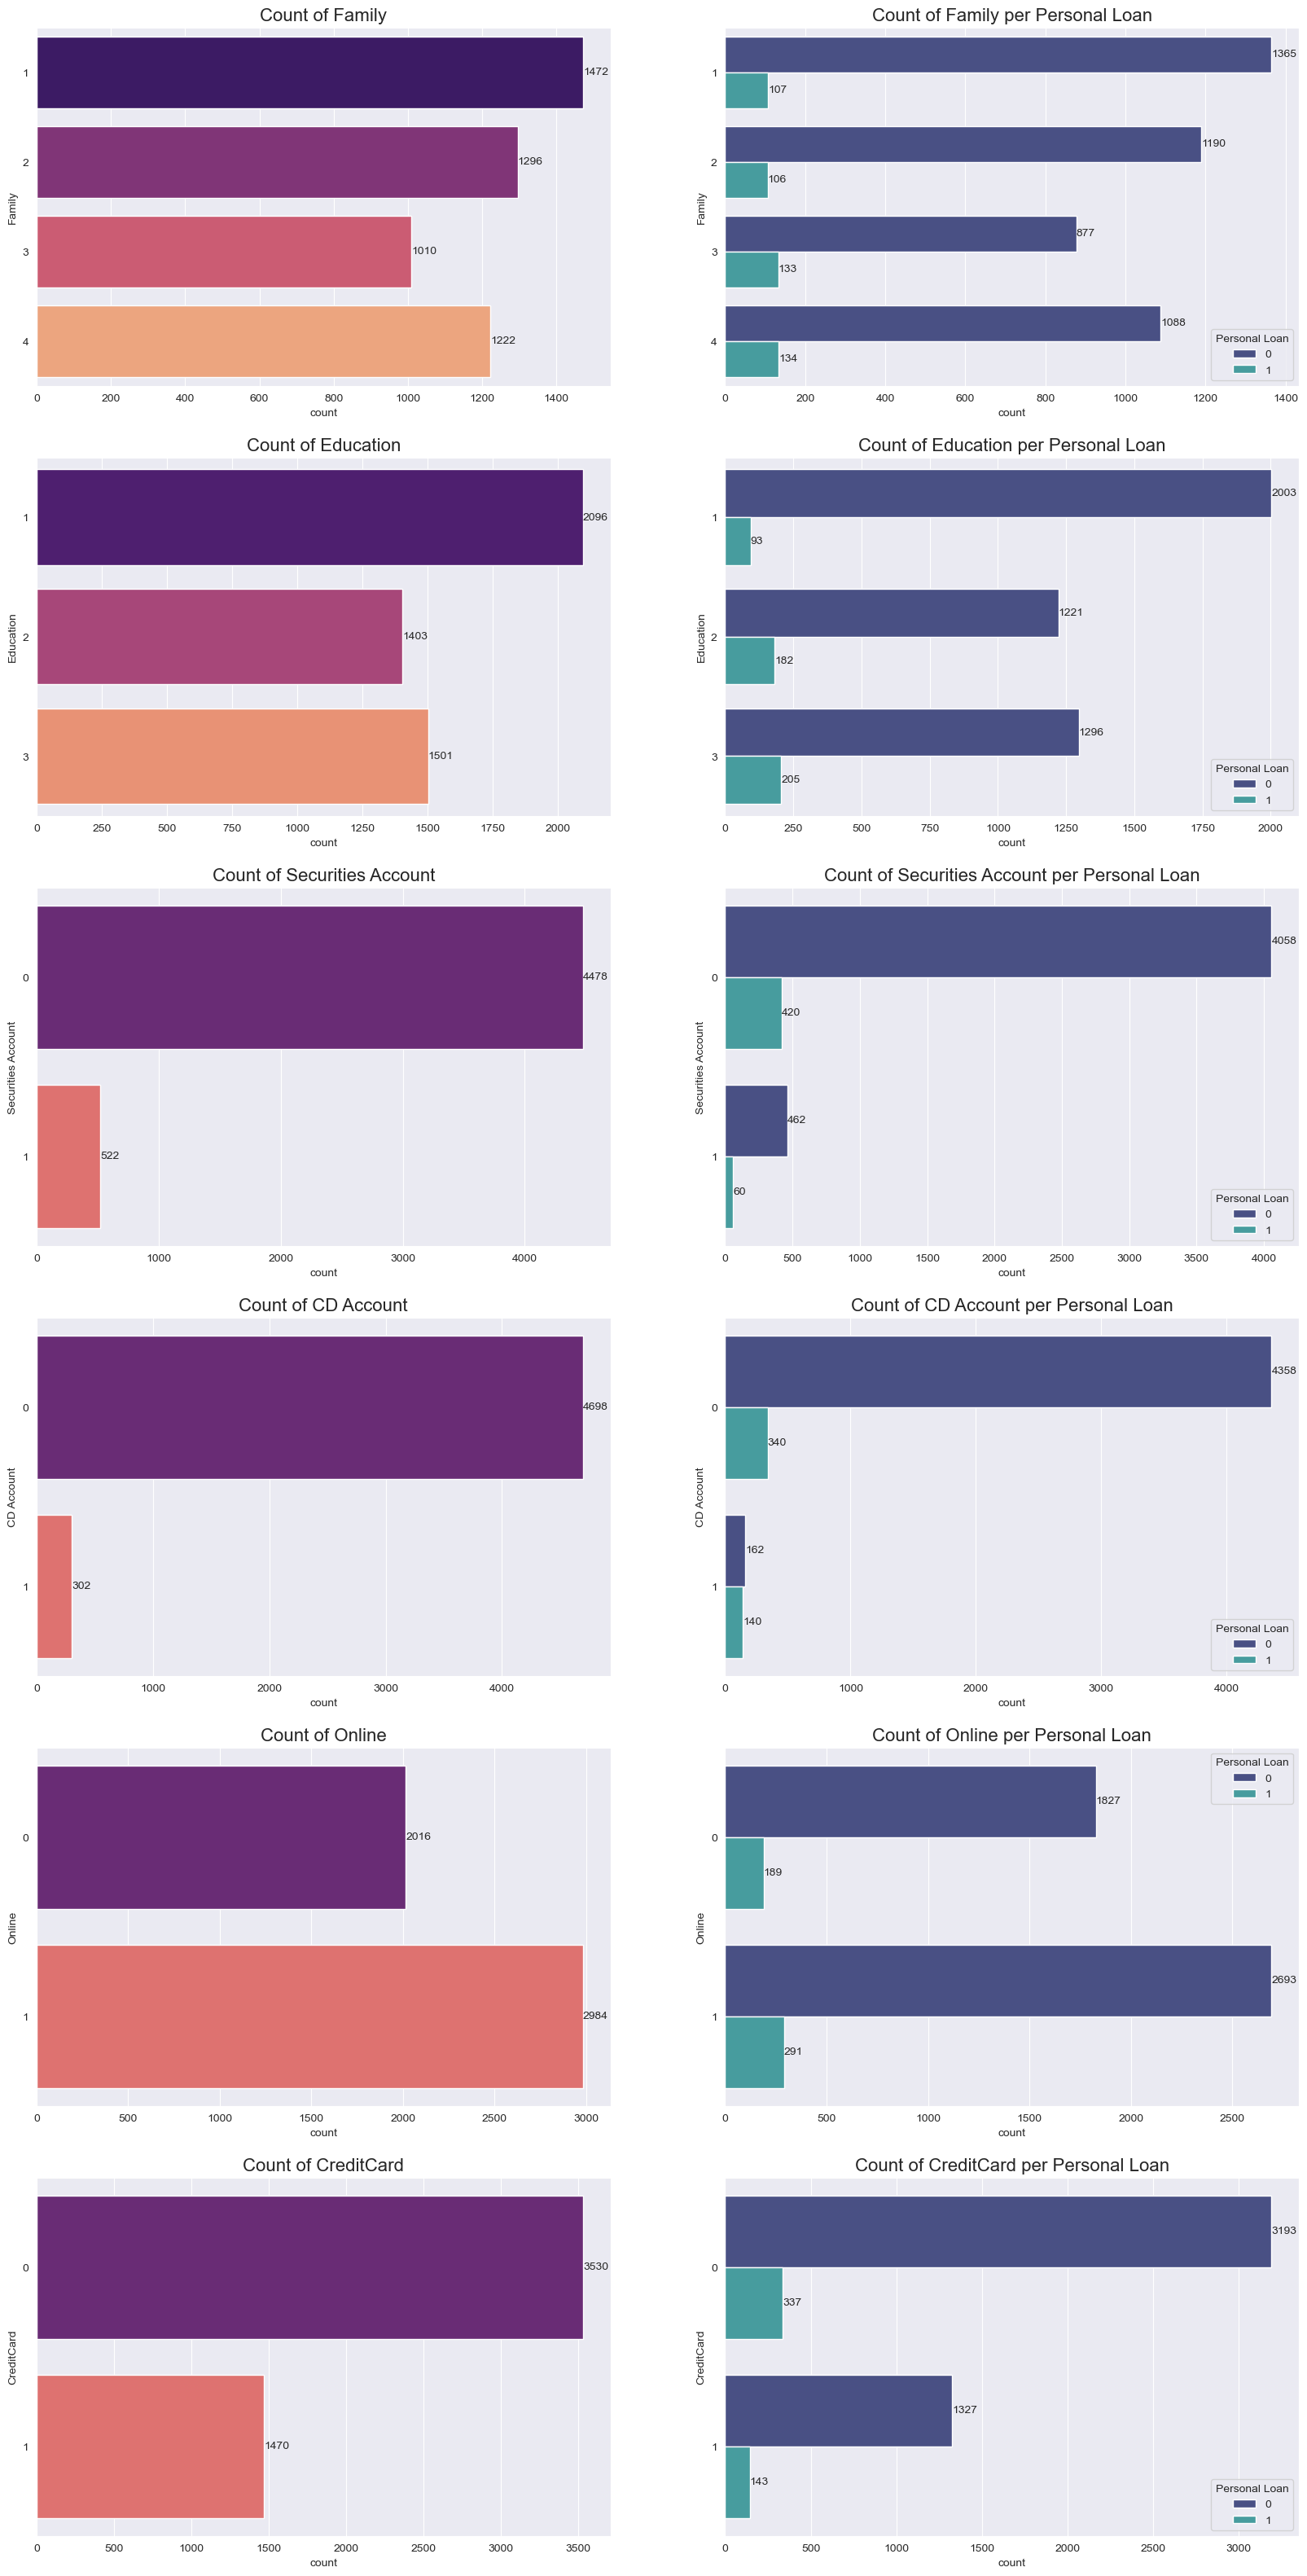

In [22]:
fig, axes = plt.subplots(6,2, figsize=(20,40))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=df, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=df, y=col, palette='mako', orient='h',  hue='Personal Loan',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Personal Loan', fontsize='16')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

In [23]:
print("An overview of percentages of each unique value in different categorical features:")
df_nunique = {var: pd.DataFrame((df[var].value_counts() / len(df[var]) * 100).map('{:.2f}%'.format)) 
              for var in ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']}

# List of DataFrames to be displayed side by side
tables = ([df_nunique[var] for var in df_nunique])

# Concatenate the DataFrames horizontally
result = pd.concat(tables, axis=1)
print(result)

An overview of percentages of each unique value in different categorical features:
   Family Education Securities Account CD Account  Online CreditCard
1  29.44%    41.92%             10.44%      6.04%  59.68%     29.40%
2  25.92%    28.06%                NaN        NaN     NaN        NaN
4  24.44%       NaN                NaN        NaN     NaN        NaN
3  20.20%    30.02%                NaN        NaN     NaN        NaN
0     NaN       NaN             89.56%     93.96%  40.32%     70.60%


In [24]:
# Describing the categorical variables
cat_cols.describe()

Family    Education  Securities Account  CD Account       Online  \
count  5000.000000  5000.000000         5000.000000  5000.00000  5000.000000   
mean      2.396400     1.881000            0.104400     0.06040     0.596800   
std       1.147663     0.839869            0.305809     0.23825     0.490589   
min       1.000000     1.000000            0.000000     0.00000     0.000000   
25%       1.000000     1.000000            0.000000     0.00000     0.000000   
50%       2.000000     2.000000            0.000000     0.00000     1.000000   
75%       3.000000     3.000000            0.000000     0.00000     1.000000   
max       4.000000     3.000000            1.000000     1.00000     1.000000   

        CreditCard  
count  5000.000000  
mean      0.294000  
std       0.455637  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

 Exploring Numerical Features

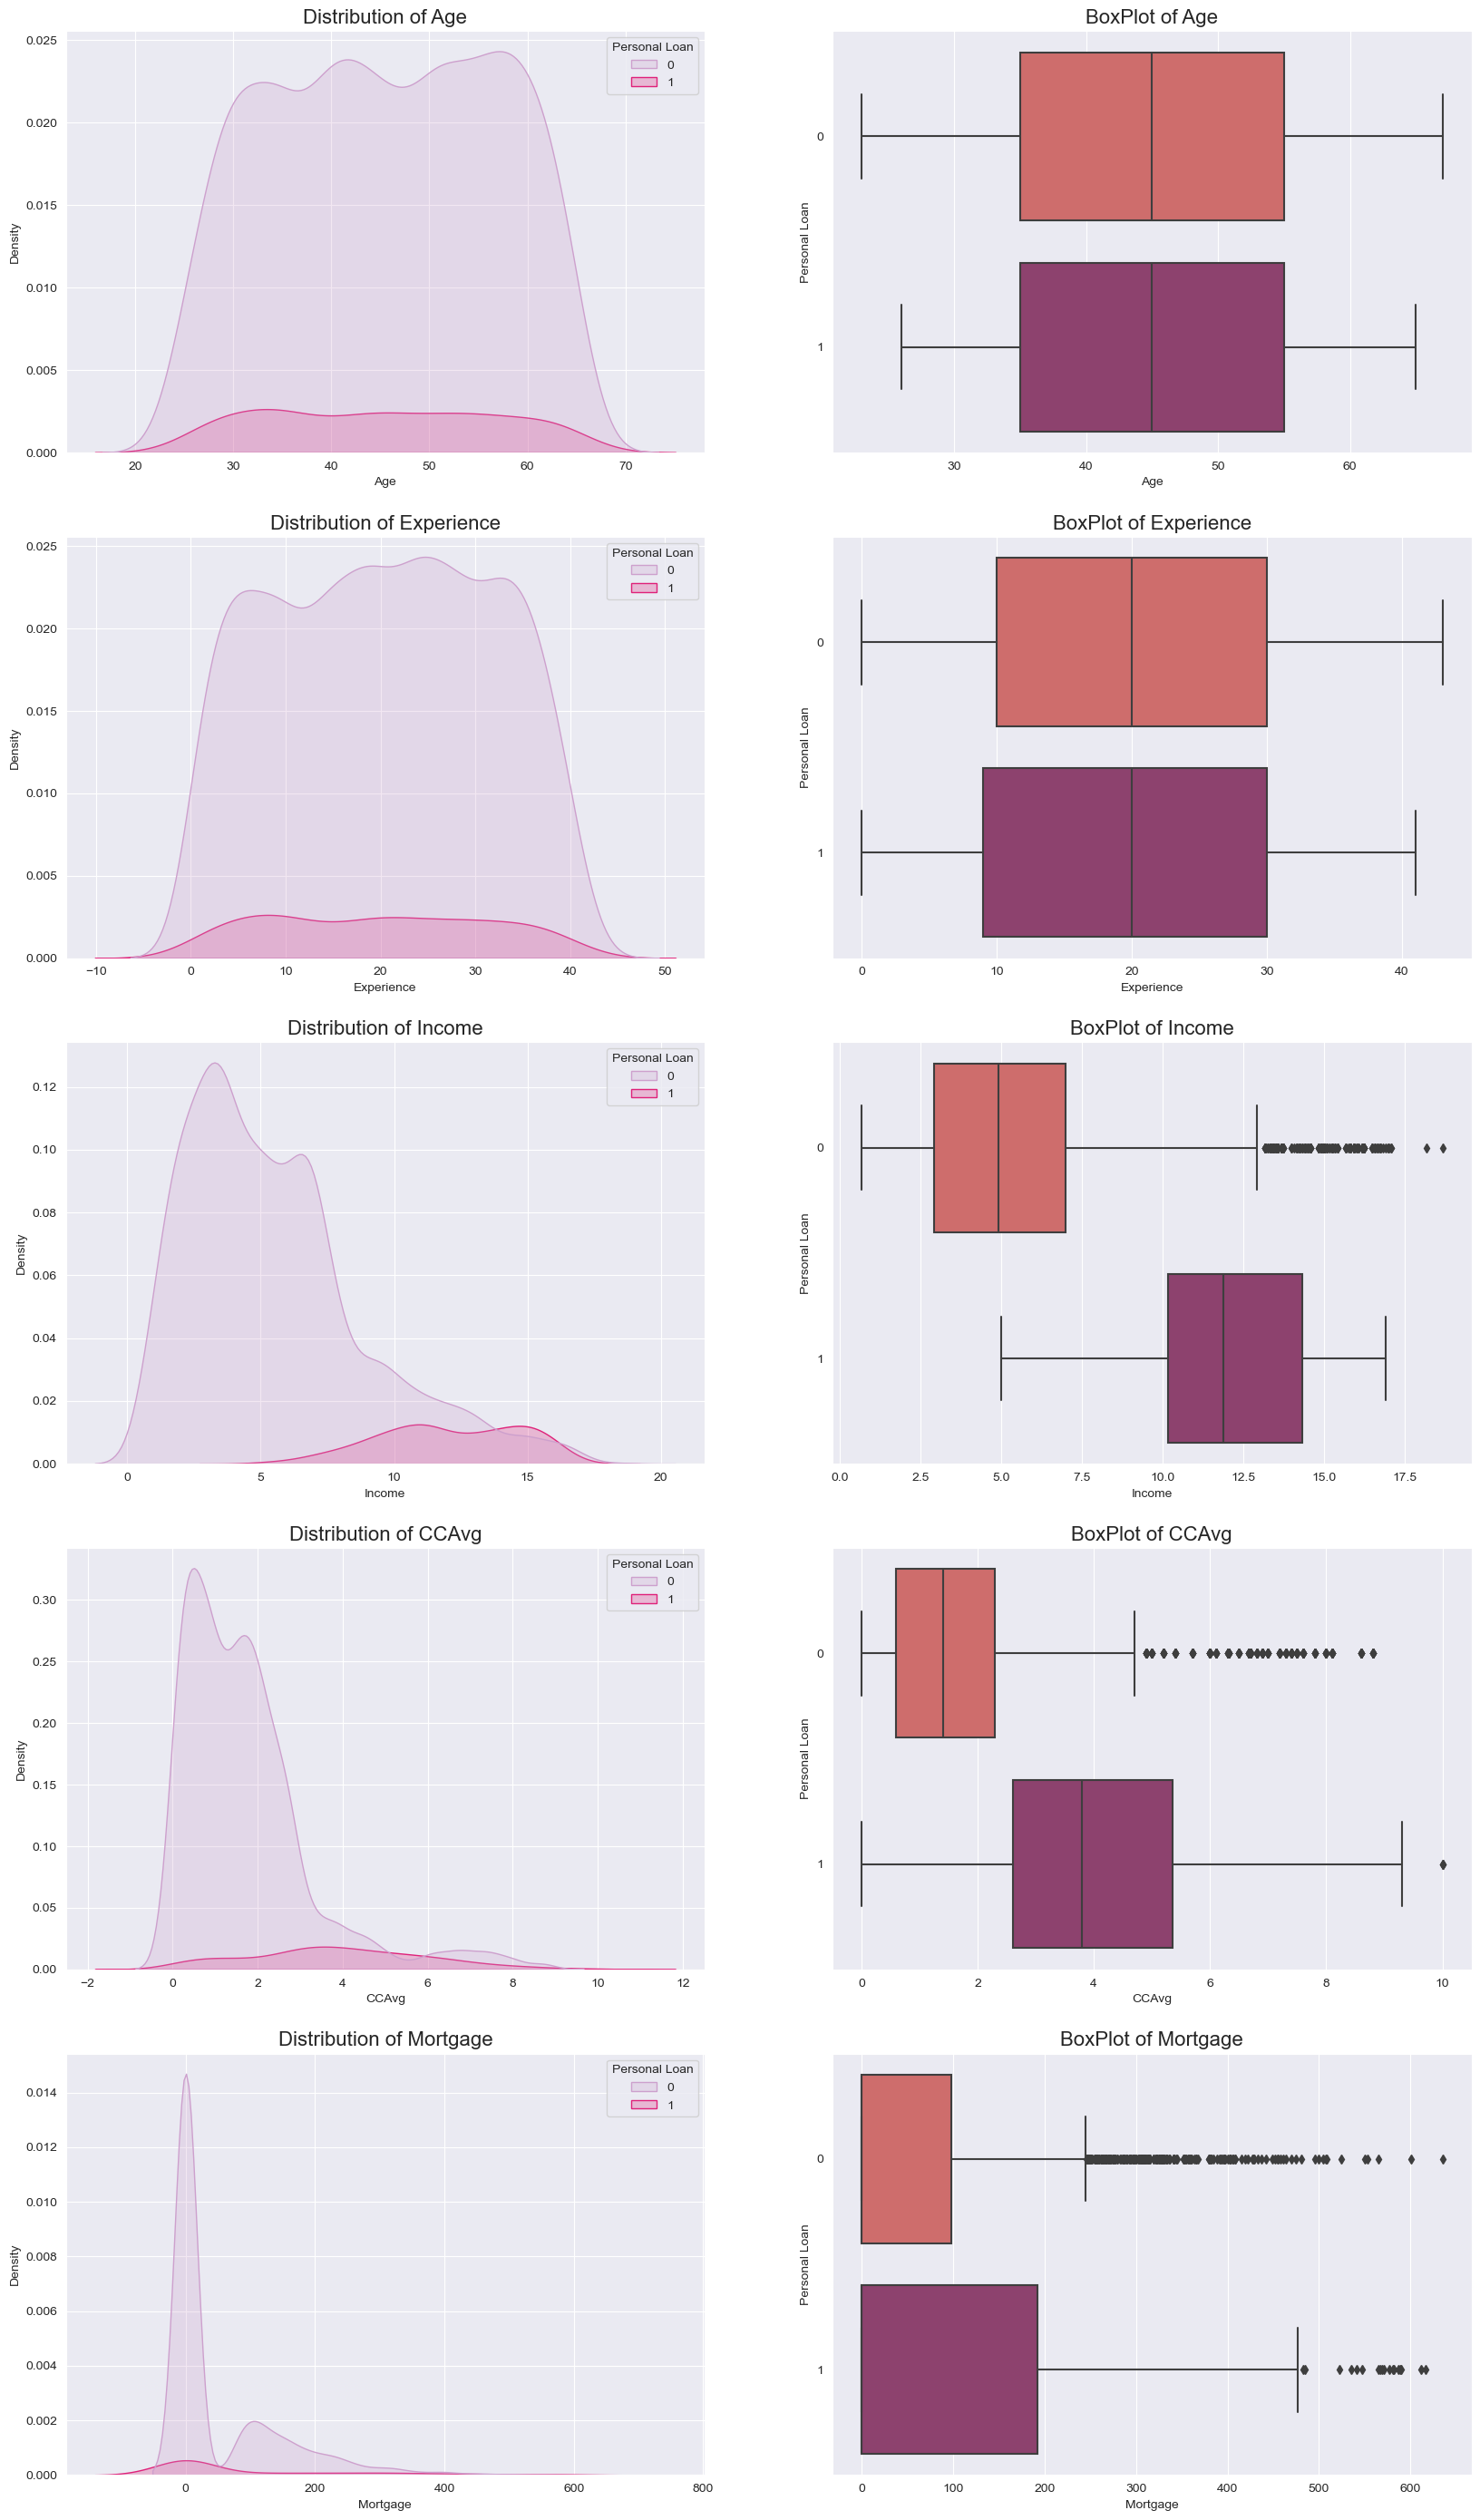

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(20, 35))
sns.set_style('darkgrid')

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, palette='PuRd', fill=True, hue='Personal Loan',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=df, x=col, palette='flare', y='Personal Loan', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')

plt.show()

The above plot shows that

`*`A **normal distribution (with no skewness)** is observed in the features of **Age and Experience** for both customers who accept and do not accept the personal loan.

`*`A **positive and normal skewness** is observed in the distribution of **Income** for customers who both don't accept and accept personal loans, respectively.

`*`Moreover, customers with **lower incomes don't accept the personal loan**, while most customers with **incomes ranging from 10 to 15 accept personal loan** among the customers who accept the personal loan.

`*`A **positive and normal skewness** is observed in the distribution of **CCAvg** for customers who don't accept and accept personal loans, respectively.
Moreover, customers with a **range of Avg. Spending on Credit Card per Month from 0-2, don't accept** the personal loan.

`*`A **positive skewness** is observed in the distribution of **Mortgage** for both customers who accept and do not accept the personal loan.
Moreover, customers with **zero Mortgages more than others don't accept** personal loans.


In [26]:
# The average values of borrowing and not borrowing in different variables
df.groupby(df['Personal Loan']).mean().T.style.background_gradient(cmap='PuBu')

The above distribution shows that, for the Age feature, we can observe that customers with an average age of 45.3 years didn't accept the Personal Loan, While customers with an average age of 44.8 years accept the Personal Loan.

**Multivariate Analysis**

Using multivariate analysis to see relations between features.
Our target is Personal Loan. So, check how each attribute correlates with the Personal Loan variable. It can be done as follows:

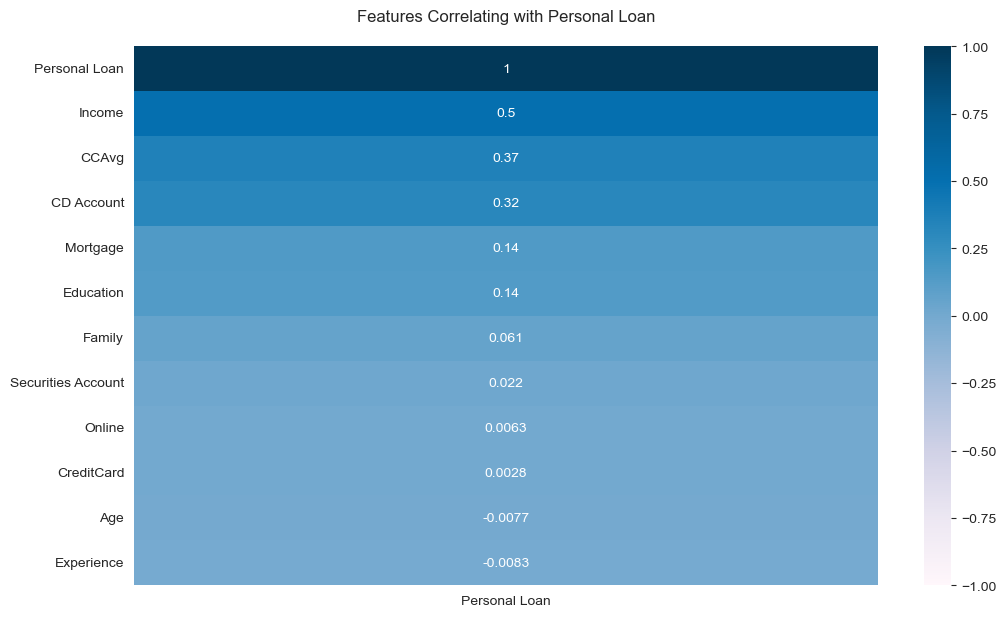

In [27]:
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (df.corr()[['Personal Loan']].sort_values (by = 'Personal Loan', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'PuBu')
heatmap.set_title ('Features Correlating with Personal Loan', fontdict = {'fontsize':12}, pad = 18);

Illustrating above plot 

`*`The correlation coefficient ranges from -1 to +1.

`*`When it is close to +1, this signifies that there is a strong positive correlation.

`*`So, we can see that there is a positive correlation between Personal Loan and Income, Personal Loan and CCAvg, Personal Loan and CD Account.


`*`When it is close to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.

`*`We can see that most of the variables except Age and Experience are positively correlated with the target.

**Discover Patterns and Relationships:**
An important step in EDA is to discover patterns and relationships between variables in the dataset. Here, seaborn heatmap will be used to explore the patterns and relationships in the dataset.

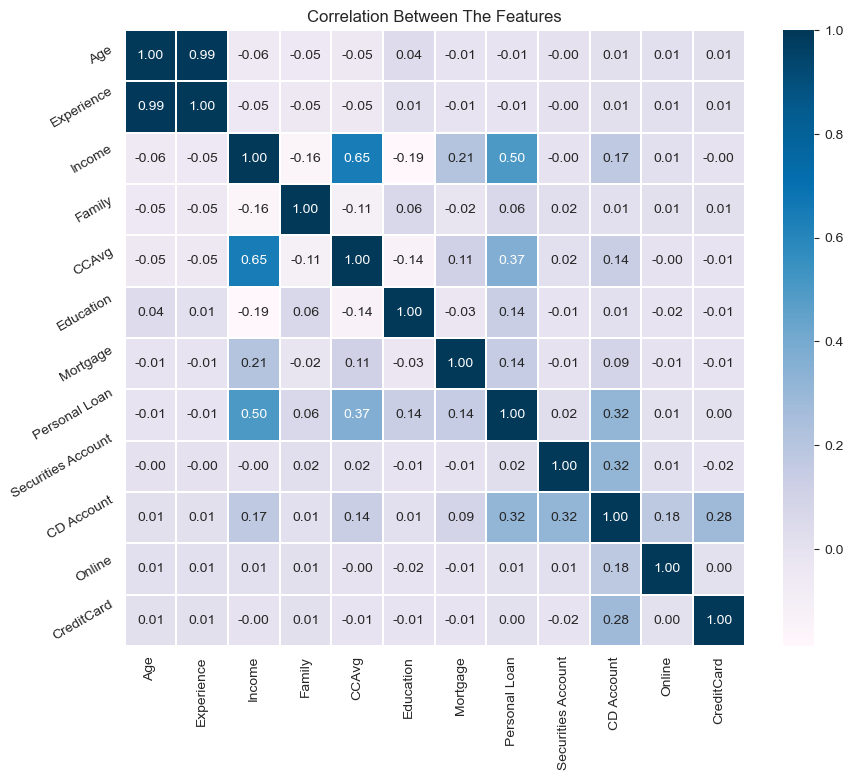

In [28]:
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlation Between The Features')
a = sns.heatmap(df.corr(), annot=True, cmap='PuBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Illustrating above plot 

`*`The heatmap above indicates a moderate correlation between CCAvg and Income.

`*`In addition, there is a strong correlation between Age and Experience.

# Model Building

# Logistic Regression

**Declare Feature Vector and Target Variable**

In [29]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

**Train Test Split**

In [30]:
# Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

**Feature Scaling Using StandardScaler**

In [31]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train1 = scaler.fit_transform(X_train1)

# Transform the test data using the same scaler
X_test1 = scaler.transform(X_test1)

**Train Logistic Regression Model**

In [32]:
#Create an instance of LogisticRegression
logistic_model = LogisticRegression(max_iter = 1000)

# Fit the logistic regression model to the training data
logistic_model.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

**Predict X-test**

In [33]:
# Make predictions on the testing data
y_pred = logistic_model.predict(X_test1)

**Check Accuracy Score**

In [34]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test1[:1000], y_pred[:1000])

# Print the accuracy score
print('Model Accuracy Score: {0:0.4f}'.format(accuracy))

Model Accuracy Score: 0.9520


**Conclusion using Logistic Regression model**

**We can see that our model accuracy score is 0.9520. So, we can conclude that our Logistics regression model is doing a good job in predicting the Personal Loan labels.**

**Confusion Matrix**

**Confusion Matrix** summarizes the results of a classification problem by displaying the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

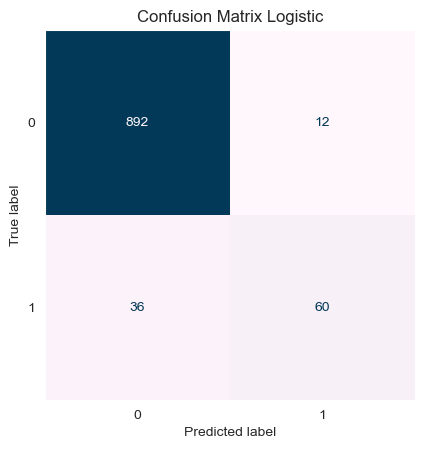

In [35]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test1, y_test1, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix Logistic')
plt.grid(False)

**Classification Report**

In [36]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000



**Calculate Performance Metrics**

In [37]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-score': f1_score(y_test, y_pred, average='macro')
    }
    
    result = pd.DataFrame(metrics, index=[model_name])
    return result

In [38]:
Logistic_result = metrics_calculator(y_test1, y_pred, 'Logistic')
Logistic_result

Accuracy  Precision    Recall  F1-score
Logistic     0.952    0.89727  0.805863  0.844042

# Naive Bayes 

Because the data is imbalanced, it's better to take advantage of the Complement Naive Bayes Classifier. To achieve the objective of building a machine learning model, the following preprocessing steps will be performed

**`*`Transforme Continuous Features to Categorical**

In [39]:
df1 = df.copy()

In [40]:
# Age
bin_Age = [0, 29, 39, 49, 59, 70]
category_Age = ['<30s', '30s', '40s', '50s', '>50s']
df1['Age_cat'] = pd.cut(df1['Age'], bins=bin_Age, labels=category_Age)

In [41]:
# Experience
bin_Experience = [-1, 9, 19, 29, 39, 50]
category_Experience = ['<10s', '10s', '20s', '30s', '>30s']
df1['Experience_cat'] = pd.cut(df1['Experience'], bins=bin_Experience, labels=category_Experience)

In [42]:
# Income
bin_Income = [0, 4, 9, 14, 20]
category_Income = ['<5s', '5s', '10s', '10>s']
df1['Income_cat'] = pd.cut(df1['Income'], bins=bin_Income, labels=category_Income)

In [43]:
# CCAvg
bin_CCAvg = [-1, 1, 3, 5, 7, 10]
category_CCAvg = ['<2s', '2s', '4s', '6s', '>6s']
df1['CCAvg_cat'] = pd.cut(df1['CCAvg'], bins=bin_CCAvg, labels=category_CCAvg)

In [44]:
# Mortgage
bin_Mortgage = [-1, 49, 99, 149, 199, 249, 299, 349, 399, 700]
category_Mortgage = ['<50s', '50s', '100s', '150s', '200s', '250s', '300s', '350s', '>350']
df1['Mortgage_cat'] = pd.cut(df1['Mortgage'], bins=bin_Mortgage, labels=category_Mortgage)

In [45]:
df1.shape

(5000, 17)

In [46]:
# Dropping extra features 
df1 = df1.drop(['Age'], axis = 1)
df1 = df1.drop(['Experience'], axis = 1)
df1 = df1.drop(['Income'], axis = 1)
df1 = df1.drop(['CCAvg'], axis = 1)
df1 = df1.drop(['Mortgage'], axis = 1)
df1.shape

(5000, 12)

**`*`Convert int64 Type to Category Type**

In [47]:
df1[df1.select_dtypes('int64').columns] = df1.select_dtypes('int64').astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Family              5000 non-null   category
 1   Education           5000 non-null   category
 2   Personal Loan       5000 non-null   category
 3   Securities Account  5000 non-null   category
 4   CD Account          5000 non-null   category
 5   Online              5000 non-null   category
 6   CreditCard          5000 non-null   category
 7   Age_cat             5000 non-null   category
 8   Experience_cat      5000 non-null   category
 9   Income_cat          5000 non-null   category
 10  CCAvg_cat           5000 non-null   category
 11  Mortgage_cat        5000 non-null   category
dtypes: category(12)
memory usage: 60.8 KB


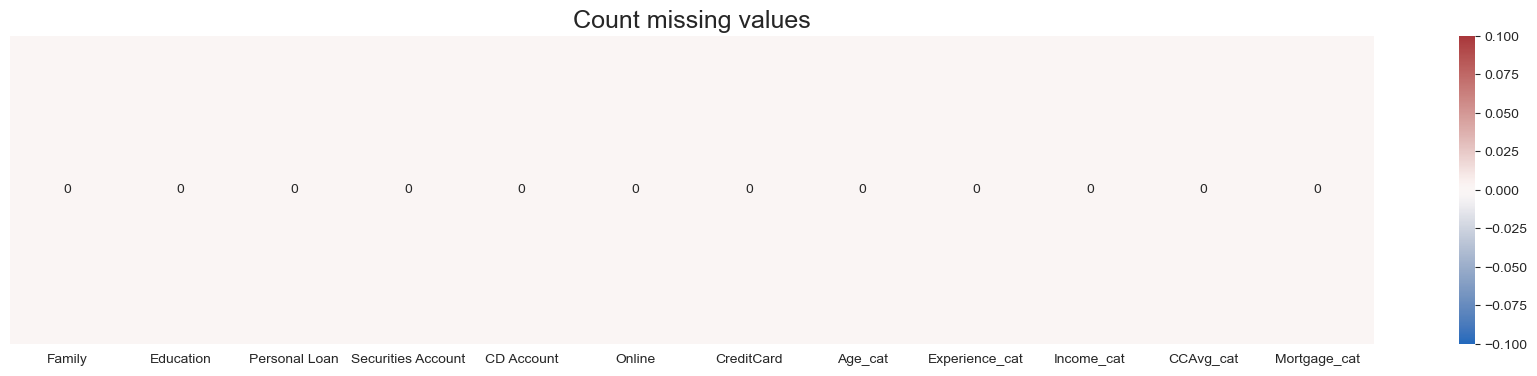

In [48]:
df1.info()
plt.figure(figsize=(22,4))
sns.heatmap((df1.isna().sum()).to_frame(name='').T,cmap='vlag', 
            annot=True, fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

**Dummy Encoding**

In [49]:
df2 = pd.get_dummies(df1.drop('Personal Loan', axis=1))
df2.insert(0, 'Personal Loan', df1['Personal Loan'])
df2 = df2.astype('int64')
df2

Personal Loan  Family_1  Family_2  Family_3  Family_4  Education_1  \
0                 0         0         0         0         1            1   
1                 0         0         0         1         0            1   
2                 0         1         0         0         0            1   
3                 0         1         0         0         0            0   
4                 0         0         0         0         1            0   
...             ...       ...       ...       ...       ...          ...   
4995              0         1         0         0         0            0   
4996              0         0         0         0         1            1   
4997              0         0         1         0         0            0   
4998              0         0         0         1         0            0   
4999              0         0         0         1         0            1   

      Education_2  Education_3  Securities Account_0  Securities Account_1  \
0               0            0                     0                     1   
1               0            0                     0                     1   
2               0            0                     1                     0   
3               1            0                     1                     0   
4               1            0                     1                     0   
...           ...          ...                   ...                   ...   
4995            0            1                     1                     0   
4996            0            0                     1                     0   
4997            0            1                     1                     0   
4998            1            0                     1                     0   
4999            0            0                     1                     0   

      ...  CCAvg_cat_>6s  Mortgage_cat_<50s  Mortgage_cat_50s  \
0     ...              0                  1                 0   
1     ...              0                  1                 0   
2     ...              0                  1                 0   
3     ...              0                  1                 0   
4     ...              0                  1                 0   
...   ...            ...                ...               ...   
4995  ...              0                  1                 0   
4996  ...              0                  0                 1   
4997  ...              0                  1                 0   
4998  ...              0                  1                 0   
4999  ...              0                  1                 0   

      Mortgage_cat_100s  Mortgage_cat_150s  Mortgage_cat_200s  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
4995                  0                  0                  0   
4996                  0                  0                  0   
4997                  0                  0                  0   
4998                  0                  0                  0   
4999                  0                  0                  0   

      Mortgage_cat_250s  Mortgage_cat_300s  Mortgage_cat_350s  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
4995                  0                  0                  0   
4996                  0                  0                  0   
4997     

**X and y Arrays**

In [50]:
X = df2.drop('Personal Loan', axis=1)
y = df2['Personal Loan'].ravel()

**Train Test Split**

In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

**Feature Scaling Using MinMaxScaler**

In [52]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train2 = scaler.fit_transform(X_train2)

# Transform the test data using the same scaler
X_test2 = scaler.transform(X_test2)

**Train Complement Naive Bayes Model**

In [53]:
CNBmodel = ComplementNB()
CNBmodel.fit(X_train2, y_train2)

ComplementNB()

**Predict X-test**

In [54]:
y_pred = CNBmodel.predict(X_test2)

**Check Accuracy Score**

In [55]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

Model Accuracy Score: 0.8710


**Confusion Matrix**

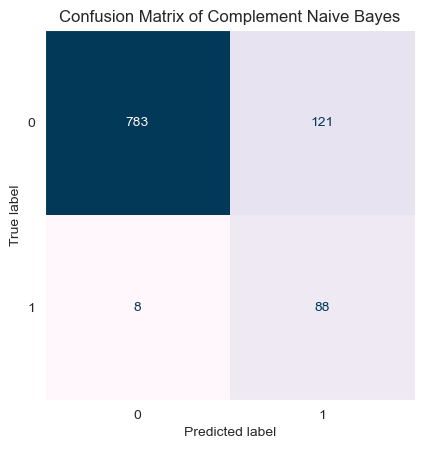

In [56]:
ConfusionMatrixDisplay.from_estimator(CNBmodel, X_test2, y_test2, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Complement Naive Bayes')
plt.grid(False)

**Classification Report**

In [57]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       904
           1       0.42      0.92      0.58        96

    accuracy                           0.87      1000
   macro avg       0.71      0.89      0.75      1000
weighted avg       0.94      0.87      0.89      1000



**Model Performance Metrics**

In [58]:
CNB_result = metrics_calculator(y_test2, y_pred, 'Complement Naive Bayes')
CNB_result

Accuracy  Precision    Recall  F1-score
Complement Naive Bayes     0.871   0.705469  0.891409  0.750471

# K-Nearest Neighbour (KNN)ㅤ

**X and y Arrays**

In [59]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

**Training and Test Accuracy**

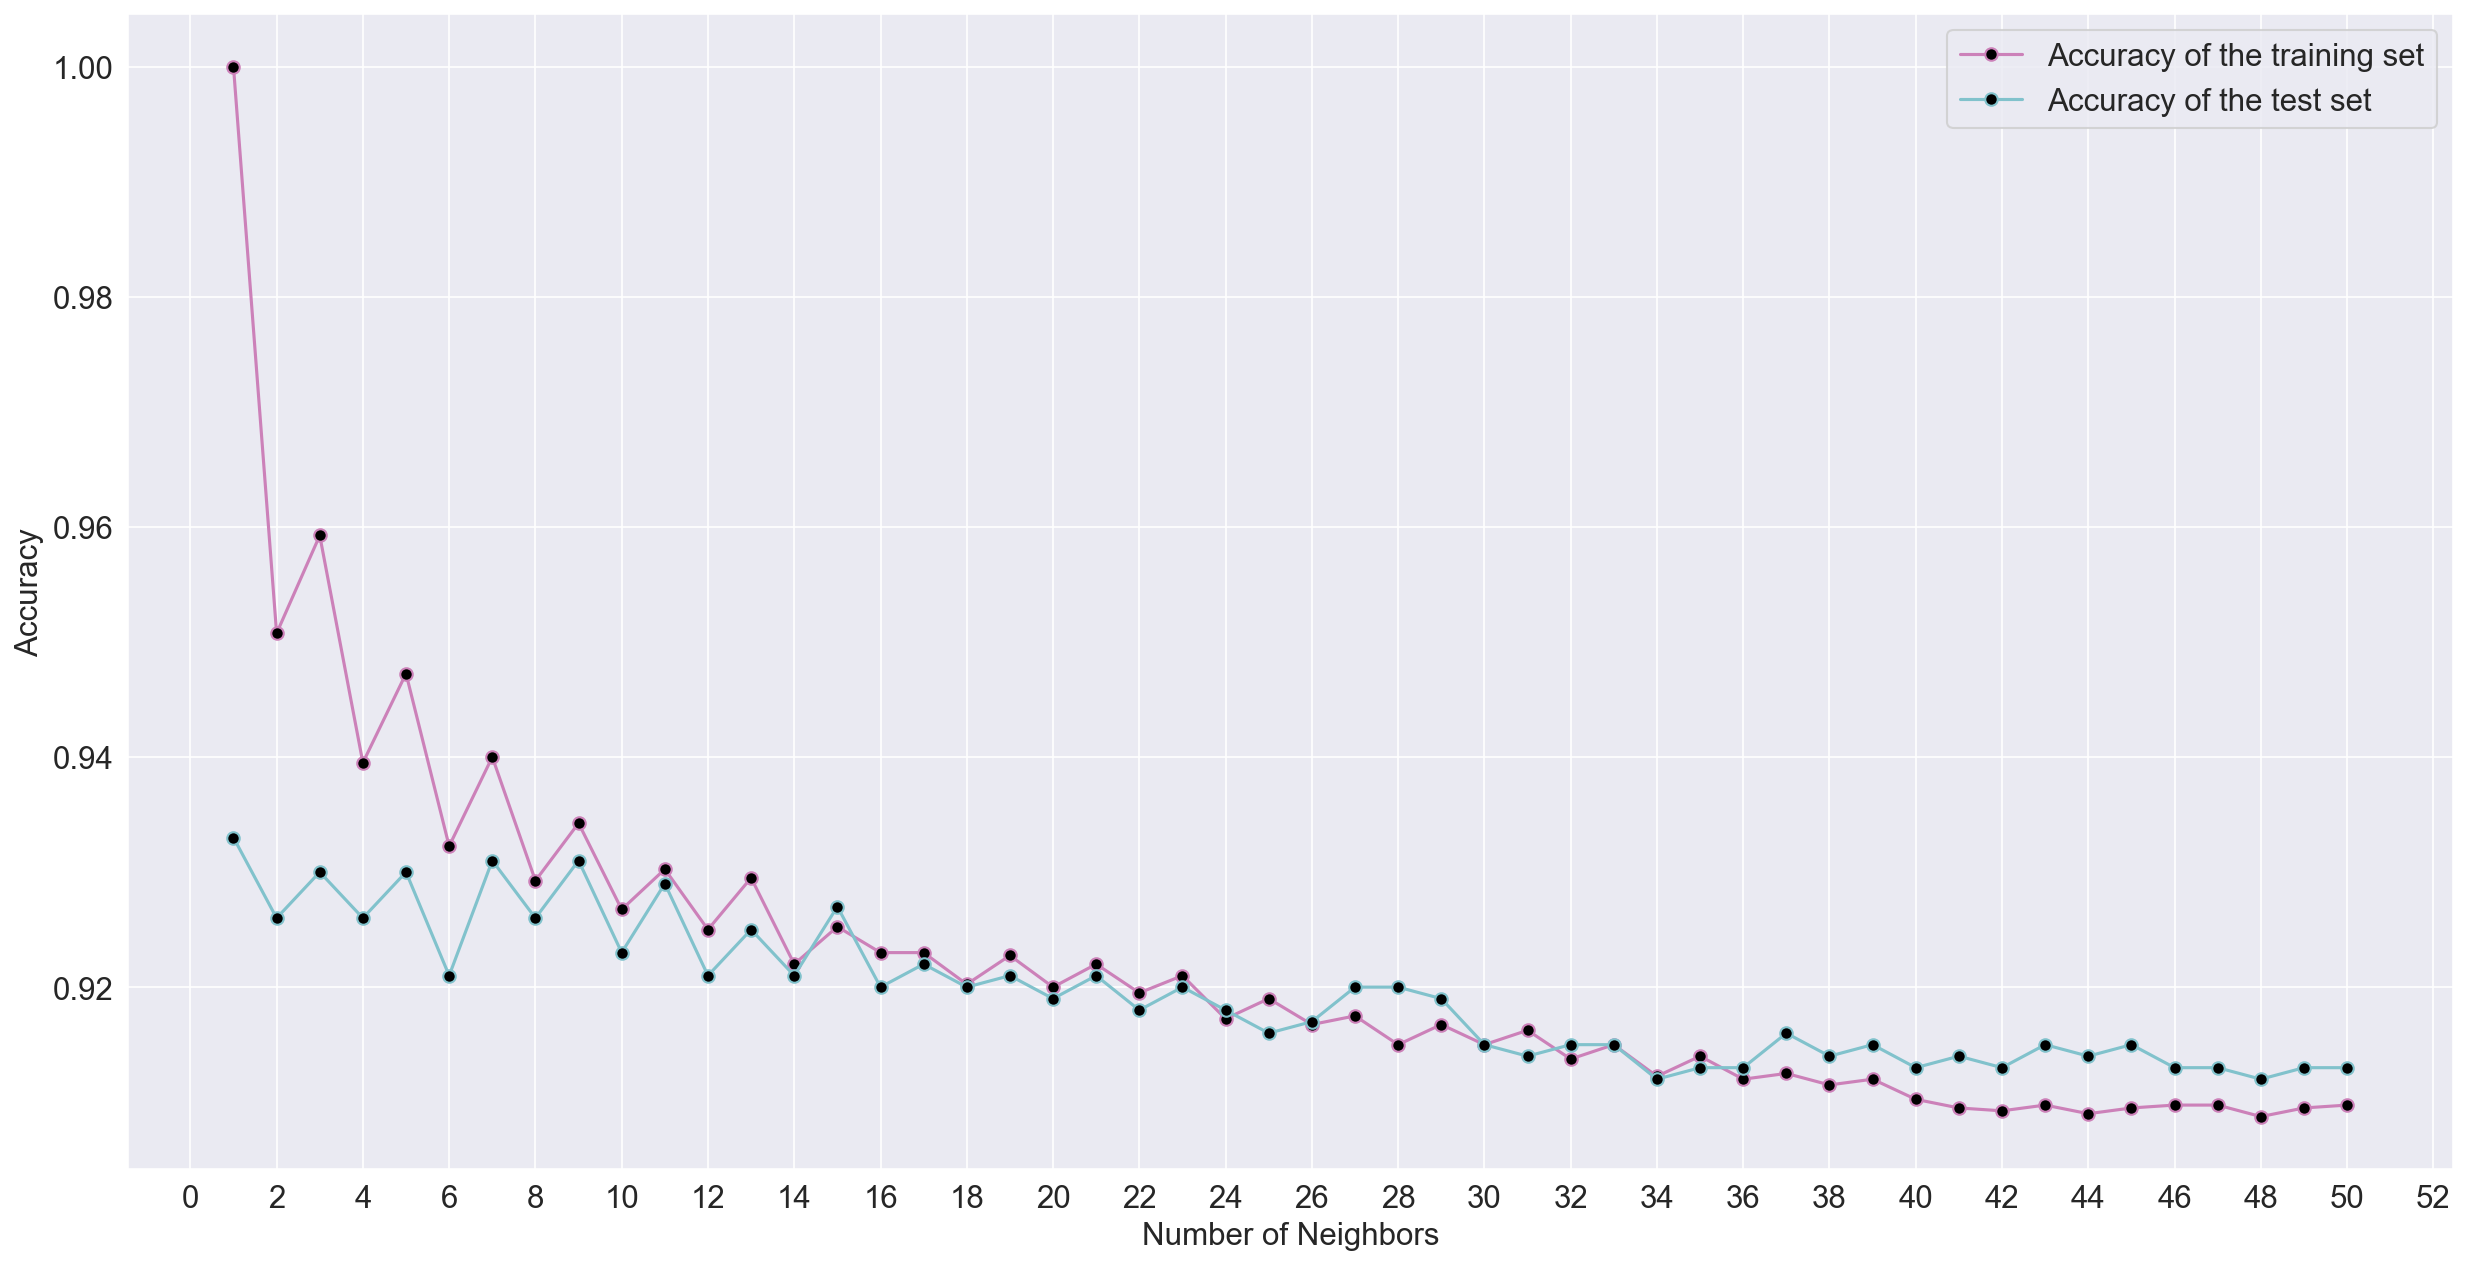

In [60]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=0)

training_accuracy = [KNeighborsClassifier(n_neighbors=i).fit(X_train3, y_train3).score(X_train3, y_train3) for i in range(1, 51)]
test_accuracy = [KNeighborsClassifier(n_neighbors=i).fit(X_train3, y_train3).score(X_test3, y_test3) for i in range(1, 51)]

plt.figure(figsize=(20, 10), dpi=150)
plt.xticks(range(0, 55, 2), fontsize=15)
plt.yticks(fontsize=15)

plt.plot(range(1, 51), training_accuracy, label="Accuracy of the training set", color='#cc81b9', 
                       marker='o', markerfacecolor='black', markersize=6)
plt.plot(range(1, 51), test_accuracy, label="Accuracy of the test set", color='#81c2cc', 
                       marker='o', markerfacecolor='black', markersize=6)

plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("Number of Neighbors", fontsize=15)
plt.legend(fontsize=15)
plt.show()

**Find the Best K for KNN Classifier**

In [61]:
max_neighbors = 50
accuracy = np.zeros(max_neighbors)

for i in range(2, max_neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train3, y_train3)
    y_pred = knn.predict(X_test3)
    accuracy[i-1] = metrics.accuracy_score(y_test3, y_pred)

best_accuracy = np.max(accuracy)
best_k = np.argmax(accuracy) + 1

print(f"Accuracy scores:\n{accuracy}")
print(f"\nBest accuracy: {best_accuracy:.3f} for k = {best_k}")

Accuracy scores:
[0.    0.926 0.93  0.926 0.93  0.921 0.931 0.926 0.931 0.923 0.929 0.921
 0.925 0.921 0.927 0.92  0.922 0.92  0.921 0.919 0.921 0.918 0.92  0.918
 0.916 0.917 0.92  0.92  0.919 0.915 0.914 0.915 0.915 0.912 0.913 0.913
 0.916 0.914 0.915 0.913 0.914 0.913 0.915 0.914 0.915 0.913 0.913 0.912
 0.913 0.913]

Best accuracy: 0.931 for k = 7


**Train Test Split**

In [62]:
X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, stratify=y, test_size = 0.25 , random_state = 0)

**Feature Scaling Using StandardScaler**

In [63]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train3 = scaler.fit_transform(X_train3)

# Transform the test data using the same scaler
X_test3 = scaler.transform(X_test3)

**Train KNN Model**

In [64]:
knn_model = KNeighborsClassifier(n_neighbors = best_k)
knn_model.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=7)

**Predict X-test**

In [65]:
y_pred = knn_model.predict(X_test3)

**Check Accuracy Score**

In [66]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

Model accuracy score: 0.9512


**Conclusion using KNN Model**

**We can see that our model accuracy score is 0.9512 .So, we can conclude that our KNN model is doing a good job in predicting the Personal Loan labels.**

**Confusion Matrix**

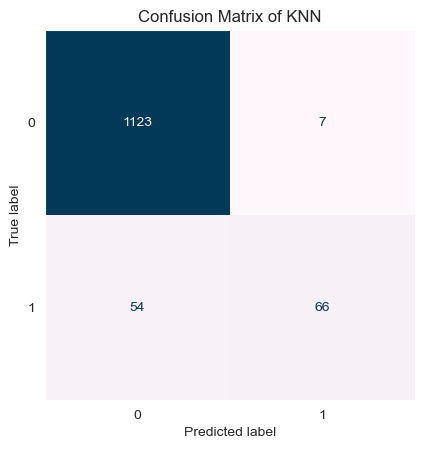

In [67]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test3, y_test3, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of KNN')
plt.grid(False)

**Classification Report**

In [68]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1130
           1       0.90      0.55      0.68       120

    accuracy                           0.95      1250
   macro avg       0.93      0.77      0.83      1250
weighted avg       0.95      0.95      0.95      1250



**Performance Metrics**

In [69]:
knn_result = metrics_calculator(y_test3, y_pred, 'KNN')
knn_result

Accuracy  Precision    Recall  F1-score
KNN    0.9512   0.929115  0.771903  0.828748

# Concatenating the Classification Models

**Comparison Performance Metrics of different Classification Models**

In [70]:
Con = pd.concat([Logistic_result, CNB_result, knn_result], axis=1)
Con

Accuracy  Precision    Recall  F1-score  Accuracy  \
Logistic                   0.952    0.89727  0.805863  0.844042       NaN   
Complement Naive Bayes       NaN        NaN       NaN       NaN     0.871   
KNN                          NaN        NaN       NaN       NaN       NaN   

                        Precision    Recall  F1-score  Accuracy  Precision  \
Logistic                      NaN       NaN       NaN       NaN        NaN   
Complement Naive Bayes   0.705469  0.891409  0.750471       NaN        NaN   
KNN                           NaN       NaN       NaN    0.9512   0.929115   

                          Recall  F1-score  
Logistic                     NaN       NaN  
Complement Naive Bayes       NaN       NaN  
KNN                     0.771903  0.828748

# Ensembling

**X and y Arrays**

In [71]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

**Train Test Split**

In [72]:
X_train, X_test, y_train, y_test = train_test_split (X, y, stratify=y, test_size = 0.25 , random_state = 0)

**Feature Scaling Using MinMaxScaler**

In [73]:
cols = X_train.columns

In [74]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

In [75]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [76]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [77]:
X_train.head()

Age Experience    Income    Family CCAvg Education  Mortgage  \
0  0.659091   0.651163  0.217222  0.000000  0.16       0.5  0.357480   
1  0.340909   0.325581  0.212778  0.333333  0.06       1.0  0.343307   
2  0.272727   0.232558  0.060000  0.666667  0.13       0.0  0.181102   
3  0.863636   0.813953  0.240556  0.000000  0.28       0.5  0.000000   
4  0.818182   0.767442  0.008889  1.000000  0.07       1.0  0.000000   

  Securities Account CD Account Online CreditCard  
0                0.0        0.0    0.0        0.0  
1                0.0        0.0    0.0        0.0  
2                0.0        0.0    0.0        0.0  
3                0.0        0.0    1.0        1.0  
4                0.0        0.0    1.0        0.0

**Train AdaBoost model**

In [78]:
#Importes required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
# define the AdaBoost model 
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

# fit the AdaBoost model on the training set
ada.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_ada = ada.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_ada)
print('Accuracy of the AdaBoost on the test set:', accuracy)


Accuracy of the AdaBoost on the test set: 0.9896


**Confusion Matrix**

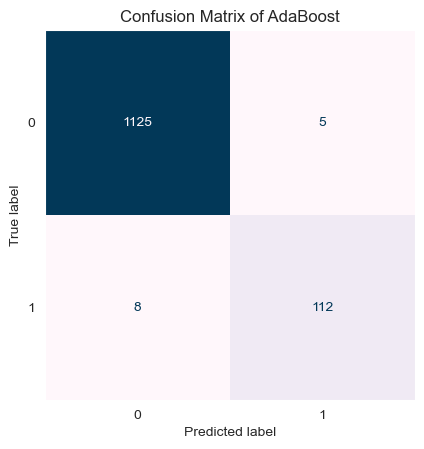

In [80]:
#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of AdaBoost')
plt.grid(False)

**Classification Report for AdaBoosting**

In [81]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1130
           1       0.96      0.93      0.95       120

    accuracy                           0.99      1250
   macro avg       0.98      0.96      0.97      1250
weighted avg       0.99      0.99      0.99      1250



**Performance Metrics for AdaBoost Model**

In [82]:
ada_result = metrics_calculator(y_test, y_pred_ada, 'AdaBoost')
ada_result

Accuracy  Precision    Recall  F1-score
AdaBoost    0.9896   0.975102  0.964454  0.969702

# Conclusion

**Concatenate all the models used** 

In [83]:
Con = pd.concat([Logistic_result, CNB_result, knn_result, ada_result], axis=1)
Con

Accuracy  Precision    Recall  F1-score  Accuracy  \
Logistic                   0.952    0.89727  0.805863  0.844042       NaN   
Complement Naive Bayes       NaN        NaN       NaN       NaN     0.871   
KNN                          NaN        NaN       NaN       NaN       NaN   
AdaBoost                     NaN        NaN       NaN       NaN       NaN   

                        Precision    Recall  F1-score  Accuracy  Precision  \
Logistic                      NaN       NaN       NaN       NaN        NaN   
Complement Naive Bayes   0.705469  0.891409  0.750471       NaN        NaN   
KNN                           NaN       NaN       NaN    0.9512   0.929115   
AdaBoost                      NaN       NaN       NaN       NaN        NaN   

                          Recall  F1-score  Accuracy  Precision    Recall  \
Logistic                     NaN       NaN       NaN        NaN       NaN   
Complement Naive Bayes       NaN       NaN       NaN        NaN       NaN   
KNN                     0.771903  0.828748       NaN        NaN       NaN   
AdaBoost                     NaN       NaN    0.9896   0.975102  0.964454   

                        F1-score  
Logistic                     NaN  
Complement Naive Bayes       NaN  
KNN                          NaN  
AdaBoost                0.969702

**After analysing and calculating the performance of different classification models it has been observed that the AdaBoost Classifier gives best result. Hence we can use Adaboost Classifier as our model for determing the liability of the customer buying Personal Loans from the bank.**